For this code, I took refernce from:<br>
    1.https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html<br>
    2.https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/<br>
    3.https://github.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/blob/master/Untitled.ipynb<br>
    4.https://machinelearningmastery.com/make-sample-forecasts-arima-python/<br>


In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
rain=pd.read_csv('rain_processed.csv')

In [4]:
#rain.drop(columns=['Unnamed: 0'],inplace=True)
exog=rain['value']
endog=rain['flood'].values

#### Checking if data is  stationary

In [5]:
#Checking for stationary
ad=adfuller(exog)
print('Exog:')
if(ad[1]<=0.5):
    print('Stationary')
else:
    print('Not Stationary')
ad=adfuller(endog)
print('Endog:')
if(ad[1]<=0.5):
    print('Stationary')
else:
    print('Not Stationary')

Exog:
Stationary
Endog:
Stationary


#### Using Autocorrelation and partial correlation to determine p,d,q

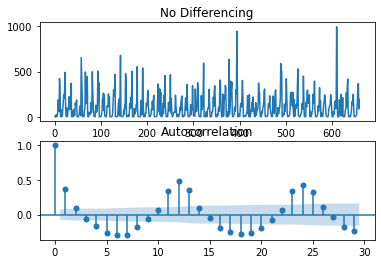

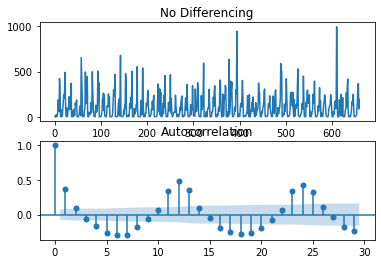

In [6]:
fig, axes = plt.subplots(2)
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
axes[0].plot(exog); axes[0].set_title('No Differencing')
plot_acf(exog, ax=axes[1])

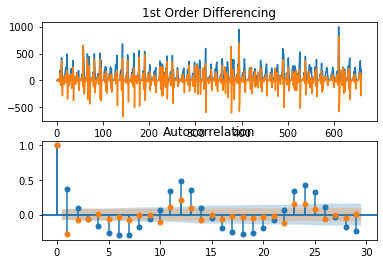

In [7]:
axes[0].plot(exog.diff()); axes[0].set_title('1st Order Differencing')
plot_acf(exog.diff().dropna(), ax=axes[1])

Setting d=1 and q=1 as setting above values bring about small changes

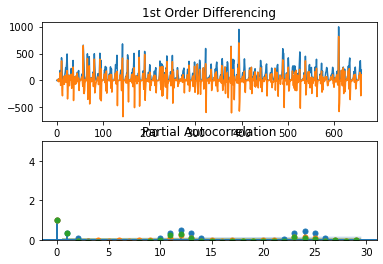

In [8]:
axes[1].set(ylim=(0,5))
plot_pacf(exog, ax=axes[1])

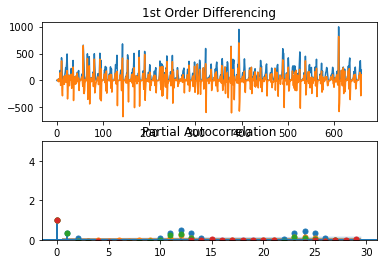

In [9]:
axes[1].set(ylim=(0,5))
plot_pacf(exog.diff().dropna(), ax=axes[1])

p=1

#### ARIMA

In [10]:
model = ARIMA(endog=endog, exog=exog,order=(1,1,1))

In [11]:
model_fit=model.fit()

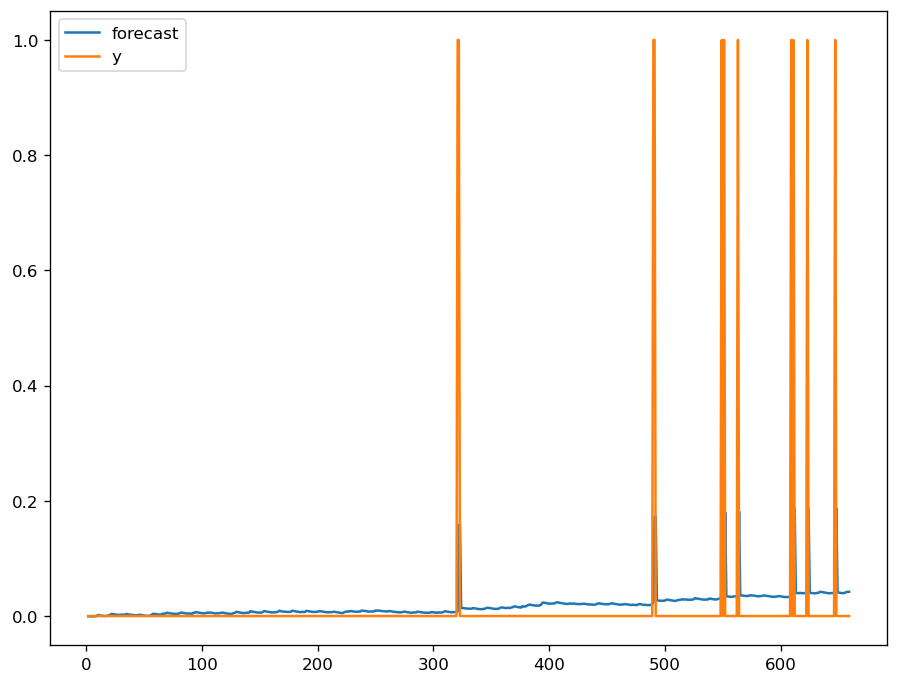

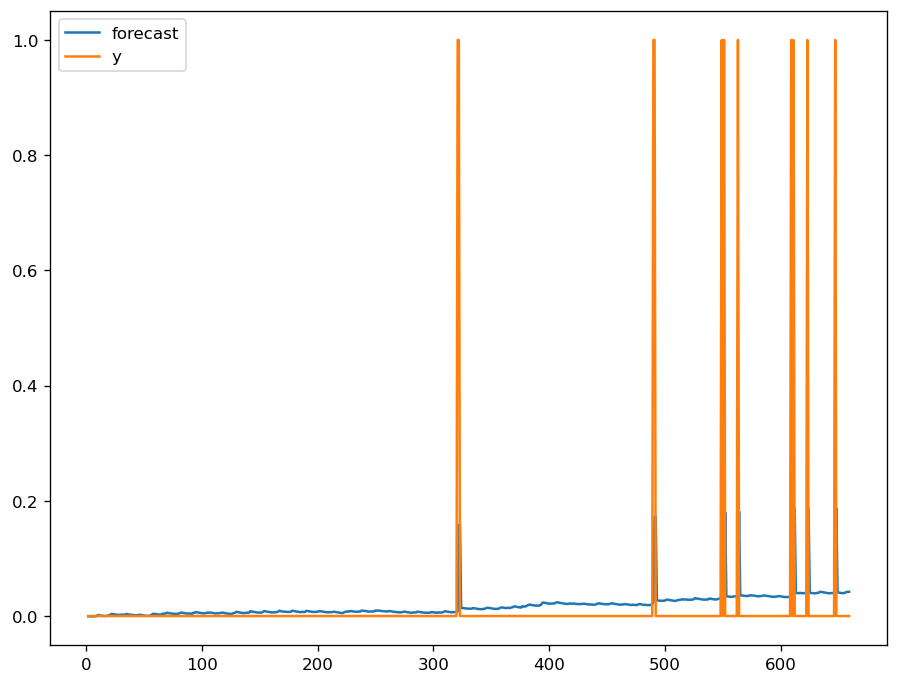

In [12]:
model_fit.plot_predict(dynamic=False)

In [13]:
exog.tail()

655    177.7
656    327.0
657    367.7
658     84.7
659    191.0
Name: value, dtype: float64

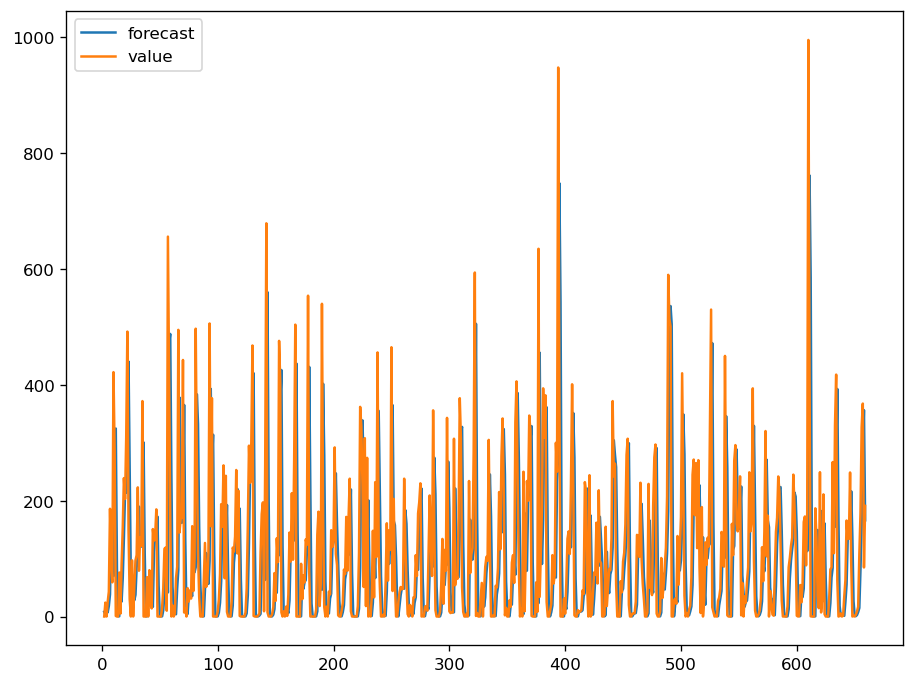

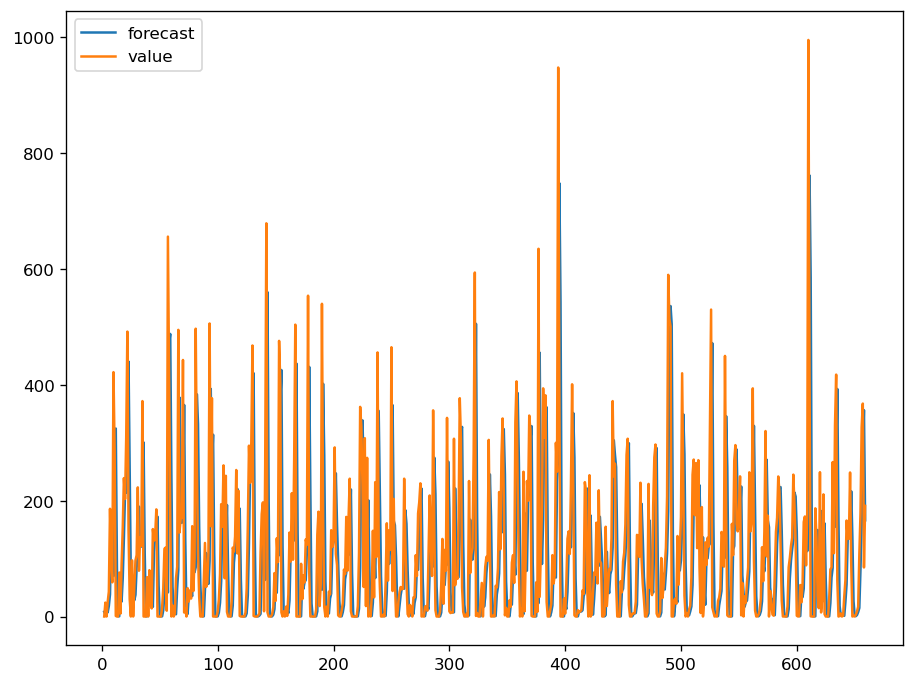

In [14]:
rain_prediction=ARIMA(rain['value'],order=(1,1,0))
model = rain_prediction.fit(disp=0)
model.plot_predict(dynamic=False)

In [15]:
out=model.forecast(steps=7)

In [16]:
output=out[0].copy()

In [17]:
output[6]=309

In [18]:
output

array([160.85476285, 169.81765914, 167.57132502, 168.53779692,
       168.58340966, 168.89296039, 309.        ])

In [19]:
model_fit.forecast(steps=7,exog=output,alpha=0.05)

(array([0.04232161, 0.04876309, 0.04999587, 0.05048021, 0.05085582,
        0.05121698, 0.05217336]),
 array([0.12542042, 0.12674892, 0.1267798 , 0.12678101, 0.12678122,
        0.12678135, 0.12678147]),
 array([[-0.20349789,  0.28814111],
        [-0.19966023,  0.29718641],
        [-0.19848798,  0.29847972],
        [-0.19800601,  0.29896643],
        [-0.19763081,  0.29934244],
        [-0.19726991,  0.29970386],
        [-0.19631375,  0.30066048]]))

#### Trying with SARIMAX

In [20]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(rain['value'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

In [21]:
seasonal_out=results.forecast(steps=7)
seas=seasonal_out.values
seas[6]=309

In [22]:
model_fit.forecast(steps=7,exog=seas,alpha=0.05)

(array([0.04170254, 0.04748457, 0.048045  , 0.04788128, 0.04771546,
        0.0476675 , 0.04862389]),
 array([0.12542042, 0.12674892, 0.1267798 , 0.12678101, 0.12678122,
        0.12678135, 0.12678147]),
 array([[-0.20411696,  0.28752205],
        [-0.20093875,  0.29590789],
        [-0.20043885,  0.29652884],
        [-0.20060494,  0.2963675 ],
        [-0.20077117,  0.29620208],
        [-0.20081938,  0.29615438],
        [-0.19986323,  0.29711101]]))

The model is not predicting a flood